In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

from matplotlib import animation
from IPython.display import HTML

**Exercise 17.12**

The displacement $u = u(x, t)$ of an infinitely long string is governed by the wave equation

$$\frac{\partial^{2} u}{\partial t^{2}} = 4 \frac{\partial^{2} u}{\partial x^{2}}, \quad -\infty<x<\infty, \quad t>0.$$

At time $t = 0$ an initial signal is given of the form

$$
u(x,0)=f(x)=
\begin{cases}
    x , & 0<x<1, \\
    -x+2, & 1<x<2, \\
    0, & \text{othewise},
\end{cases}
$$

$$\frac{\partial u}{\partial t}(x,0)=0, \quad -\infty<x<\infty.$$


The solution is 
$$
u(x,t) = \frac{1}{2}[f(x+2t)-f(x-2t)].
$$

Let's explore the solutions graphically.

First, let's define the function $f(x)$ and the solution $u(x,t)$.


In [2]:
# change c>0 for a different travel speed
c = 2
def f(x):
    cond = [(0 < x) &  (x <= 1), (1 < x) & (x < 2)]
    value = [lambda x: x, lambda x: -x + 2]
    return np.piecewise(x, cond, value)
    
def u(x,t):
    return 1/2*(f(x + c*t) + f(x - c*t))

Now let's plot the solution in a three dimensional plot

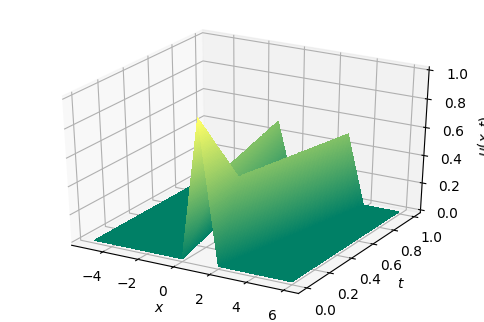

In [3]:
# We need to create a mesh
X = np.arange(-5, 6, 0.01)
T = np.arange(0, 1, 0.01)
XX, TT = np.meshgrid(X, T)
# and evaluate the solution in this mesh
U = u(XX, TT)
fig = plt.figure(dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XX, TT, U,
                       cmap='summer',
                       rstride=1, cstride=1,
                       alpha=None, antialiased=False)
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
ax.set_zlabel("$u(x,t)$")
plt.show()

This looks really cool but I still don't understand what is going on.

Let's see what happens to the characteristics, i.e., the lines in the $xt$-plane given by
$$a=x+2t,$$
and
$$a=x-2t.$$

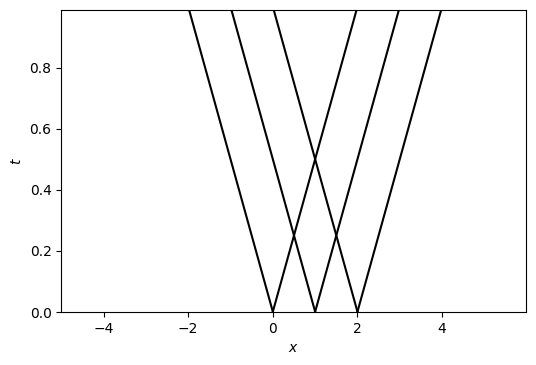

In [4]:
def charac1(x, a):
    return a/2 - x/2
def charac2(x, a):
    return -a/2 + x/2
fig = plt.figure(dpi=100)
for a in range(3):
    plt.plot(X, charac1(X, a), 'k-')
    plt.plot(X, charac2(X, a), 'k-')
plt.xlim((min(X), max(X)))
plt.ylim((min(T), max(T)))
plt.xlabel("$x$")
plt.ylabel("$t$")
plt.show()

We only plotted those characteristics where there is a change in the definition of $u(x,t)$ since

$$
u(x,t) = \frac{1}{2}[f(x+2t)-f(x-2t)].
$$
where
$$
f(x+2t)=
\begin{cases}
    x+2t , & 0<x+2t<1, \\
    -x+2t+2, & 1<x+2t<2, \\
    0, & \text{othewise},
\end{cases}
$$
and
$$
f(x-2t)=
\begin{cases}
    x-2t , & 0<x-2t<1, \\
    -(x-2t)+2, & 1<x-2t<2, \\
    0, & \text{othewise}.
\end{cases}
$$
That is, we only plotted those characteristics
$$a=x+2t, \quad a=x-2t,$$
for $a=0$, $1$, and $2$.

If we take a snapshot of the solution $u(x,t)$ at time $t$ we can plot the $u(x,t)$ versus $x$.

In [5]:
fig = plt.figure(dpi=100)
ax = plt.axes(xlim=(-4, 6), ylim=(0, 1))
plt.xlabel("$x$")
plt.ylabel("$u(x,t)$")
line, = ax.plot([], [], lw=3, color='b')

def init():
    line.set_data([], [])
    return line,

def animate(t):
    line.set_data(X, U[t, :])
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(T), interval=20, blit=True)

plt.close(anim._fig)

HTML(anim.to_html5_video())

anim.save('videos/w06_sol.mp4')

In [6]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="videos/w06_sol.mp4" type="video/mp4">
</video></div>

Can you see the two hats spliting from the inital condition and taking opposite ways? 

So, really what is going on with the solution is that the initial condition $f(x)$ is splitting into two equal parts which travel at the same speed, $c=2$, in opposite directions.

Let's put the plot of characteristics together with the plot of the solution versus $x$. The current time (snapshot) is indicated over the plot of characteristics with a blue horizontal line, and the two separeate travelling waves ($\tfrac{1}{2}f(x+ct)$ and $\tfrac{1}{2}f(x-ct)$) are explicit plotted in dashed lines.

In [7]:
fig = plt.figure(dpi=100)
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for a in range(3):
    ax1.add_line(Line2D(X, charac1(X, a), color='black'))
    ax1.add_line(Line2D(X, charac2(X, a), color='black'))
ax1.set_xlabel('')
ax1.set_ylabel('$t$')
ax1.set_xlim(min(X), max(X))
ax1.set_ylim(min(T), max(T))
line1, = ax1.plot([], [], lw=2, color='b')

ax2.set_xlabel('$x$')
ax2.set_ylabel('$u(x,t)$')
ax2.set_xlim(min(X), max(X))
ax2.set_ylim(np.amin(U), np.amax(U))
line2, = ax2.plot([], [], lw=3, color='b')
line2a, = ax2.plot([], [], lw=3, color='b', ls='--')
line2b, = ax2.plot([], [], lw=3, color='b', ls='--')

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line2a.set_data([], [])
    line2b.set_data([], [])
    return line1, line2, line2a, line2b

def animate(i):
    line1.set_data(X, 0*X+T[i])
    line2.set_data(X, U[i, :])
    line2a.set_data(X, 0.5*f(X + c*T[i]))
    line2b.set_data(X, 0.5*f(X - c*T[i]))
    return line1, line2, line2a, line2b

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(T), interval=20, blit=True)

plt.close(anim._fig)

HTML(anim.to_html5_video())

anim.save('videos/w06_sol_and_charac.mp4')

In [8]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="videos/w06_sol_and_charac.mp4" type="video/mp4">
</video></div>